## Quiz #0401

### "Optimal number of clusters for K-means clustering"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
%matplotlib inline

#### Answer the following question by providing Python code:

In [41]:
# We will use simulated data.
# 3 clusters in 8 dimensional space.
# Hard to visualize!
X, label = make_blobs(n_samples=150, n_features=8, centers=3, cluster_std = 2, random_state=123)
X.shape

(150, 8)

1). Define a function that calculates the "total internal sum of squares".
- X         :   Data.
- centers   :   Array that contains the centroid coordinates. Calculated by kmeans.
- clusters  :   Array of cluster labels. Calculated by kmeans. <br> <br>
HINT: Implement the formula from the lecture note.

In [42]:
kmeans= KMeans(n_clusters=3,random_state=123)
kmeans.fit(X)
clusters = kmeans.labels_
centers = kmeans.cluster_centers_

def total_internal_ss(X, centers, clusters):
    X_labels = list(zip(clusters, X))
    iss=0
    for lbl, x in X_labels:
        iss += (x-centers[lbl])**2
    return sum(iss)

print(total_internal_ss(X, centers, clusters))
    

4665.301322394901


2). Visualize as a Scatter plot the "total internal sum of squares" vs N# of clusters. 
- Then, determine the optimal number of clusters.
- Is this number the same as expected?

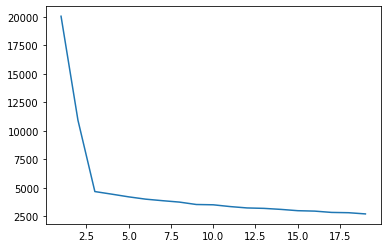

In [43]:
tiss = []
for i in range(1,20):
    kmeans= KMeans(n_clusters=i,random_state=123)
    kmeans.fit(X)
    clusters = kmeans.labels_
    centers = kmeans.cluster_centers_
    tiss.append(total_internal_ss(X, centers, clusters))

plt.plot([i for i in range(1,20)], tiss)


In [45]:
#the number is the same as expected according to the elbow method ==> k = 3